In [1]:
# Experiment Preparation

# Method: PACF

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
startdate_training = '2012-04-01'
enddate_training = '2020-05-01'

datasource = 'SPY'
data = yf.download(datasource,start = startdate_training,end = enddate_training)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-02,140.639999,142.210007,140.360001,141.839996,116.761978,151741100
2012-04-03,141.639999,141.880005,140.429993,141.259995,116.284523,155806700
2012-04-04,140.220001,140.339996,139.339996,139.860001,115.132118,146896000
2012-04-05,139.380005,140.199997,139.259995,139.789993,115.074440,137439400
2012-04-09,138.029999,139.839996,137.839996,138.220001,113.782043,127555900
...,...,...,...,...,...,...
2020-04-24,280.730011,283.700012,278.500000,282.970001,273.704102,85063200
2020-04-27,285.119995,288.269989,284.619995,287.049988,277.650421,77896600
2020-04-28,291.019989,291.399994,285.399994,285.730011,276.373718,105270000


In [4]:
# The function shift other column except Close

def data_shift(data,target):
    data_shifted = data.drop([target],axis=1).shift()
    data_preprocessed = pd.concat([data_shifted,data[target]], axis=1)
    data_preprocessed.dropna(inplace=True)
    return data_preprocessed

In [5]:
data_preprocessed = data_shift(data,'Close')
data_preprocessed

,Open,High,Low,Adj Close,Volume,Close
Date,,,,,,
2012-04-03,140.639999,142.210007,140.360001,116.761978,151741100.0,141.259995
2012-04-04,141.639999,141.880005,140.429993,116.284523,155806700.0,139.860001
2012-04-05,140.220001,140.339996,139.339996,115.132118,146896000.0,139.789993
2012-04-09,139.380005,140.199997,139.259995,115.074440,137439400.0,138.220001
2012-04-10,138.029999,139.839996,137.839996,113.782043,127555900.0,135.899994
...,...,...,...,...,...,...
2020-04-24,280.489990,283.940002,278.750000,269.941406,104709700.0,282.970001
2020-04-27,280.730011,283.700012,278.500000,273.704102,85063200.0,287.049988
2020-04-28,285.119995,288.269989,284.619995,277.650421,77896600.0,285.730011


In [6]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [7]:
# Original series

series_open_ = data_preprocessed.loc[:, ["Open"]]
series_high_ = data_preprocessed.loc[:, ["High"]]
series_low_ = data_preprocessed.loc[:, ["Low"]]
series_adj_ = data_preprocessed.loc[:, ["Adj Close"]]
series_volume_ = data_preprocessed.loc[:, ["Volume"]]
series_close_ = data_preprocessed.loc[:, ["Close"]]

In [8]:
# Transfer each column to series

series_open = data_preprocessed.loc[:, ["Open"]].diff().dropna()
series_high = data_preprocessed.loc[:, ["High"]].diff().dropna()
series_low = data_preprocessed.loc[:, ["Low"]].diff().dropna()
series_adj = data_preprocessed.loc[:, ["Adj Close"]].diff().dropna()
series_volume = data_preprocessed.loc[:, ["Volume"]]
series_close = data_preprocessed.loc[:, ["Close"]].diff().dropna()

# Calculate the ADF for each columns

perform_adf_test(series_open)
perform_adf_test(series_high)
perform_adf_test(series_low)
perform_adf_test(series_adj)
perform_adf_test(series_volume)
perform_adf_test(series_close)

ADF Statistic: -10.630085
p-value: 0.000000
ADF Statistic: -9.660867
p-value: 0.000000
ADF Statistic: -10.412449
p-value: 0.000000
ADF Statistic: -9.177698
p-value: 0.000000
ADF Statistic: -7.153981
p-value: 0.000000
ADF Statistic: -9.389032
p-value: 0.000000


In [9]:

series_list = []
series_list.append(series_open)
series_list.append(series_high)
series_list.append(series_low)
series_list.append(series_adj)
series_list.append(series_volume)
series_list.append(series_close)


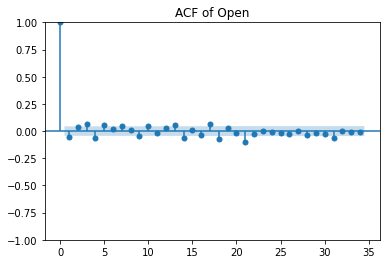

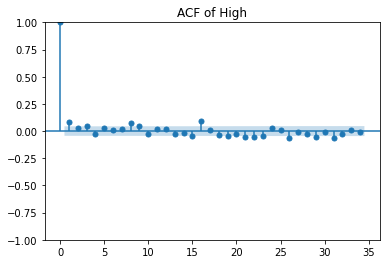

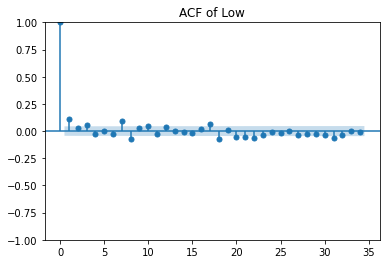

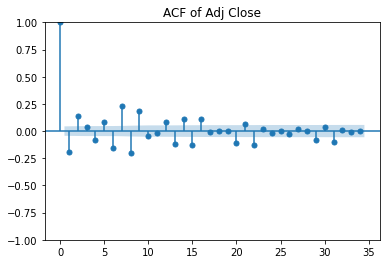

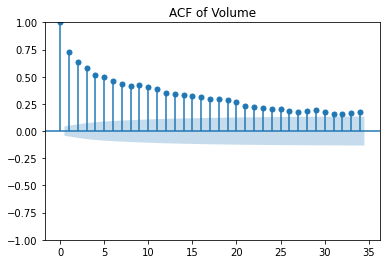

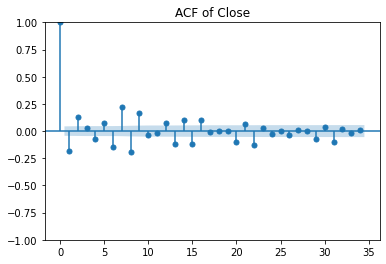

In [10]:
for series in series_list:
    plot_acf(series)
    plt.title('ACF of ' + series.columns[0])
    plt.show()

C:\Users\82422\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


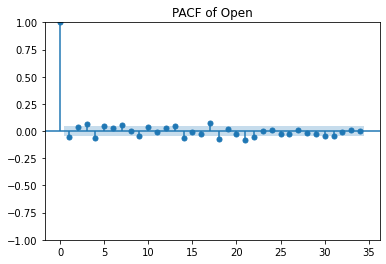

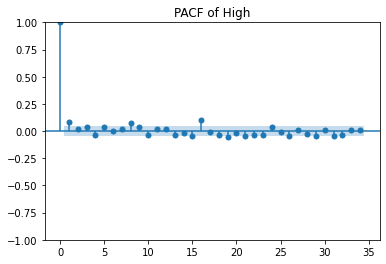

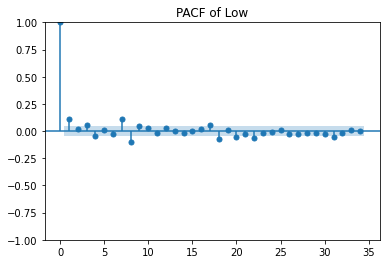

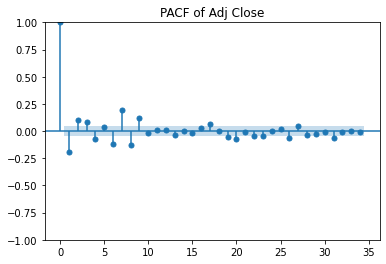

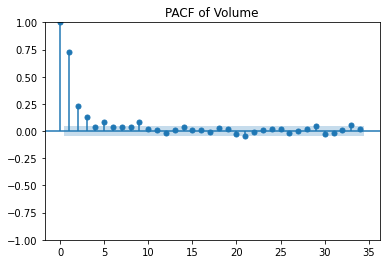

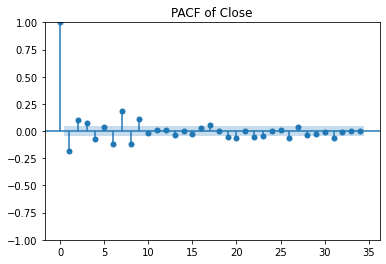

In [11]:
for series in series_list:
    plot_pacf(series)
    plt.title('PACF of ' + series.columns[0])
    plt.show()

In [12]:
# Selecting lag for each column

def ar_model_generator(series,ar_orders,i):
    
    series = series.asfreq(pd.infer_freq(series.index))
    
    
    for idx, ar_order in enumerate(ar_orders):
        #create AR(p) model
        ar_model = ARIMA(series, order=(ar_order,i,0))
        ar_model_fit = ar_model.fit()
        fitted_model_dict[ar_order] = ar_model_fit
    
    return(fitted_model_dict)

In [13]:
def AIC_BIC(fitted_model_dict,ar_orders):
    for ar_order in ar_orders:
        print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))
    print(' ')
    for ar_order in ar_orders:
        print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

In [14]:
ar_orders_open = [1, 4 ,9, 14, 17, 18, 21]
fitted_model_dict = {}
fitted_model_dict_open = ar_model_generator(series_open_,ar_orders_open,1)

In [15]:
AIC_BIC(fitted_model_dict_open,ar_orders_open)

AIC for AR(1): 9239.430432465153
AIC for AR(4): 9197.807854185106
AIC for AR(9): 9185.321923088988
AIC for AR(14): 9128.86695257931
AIC for AR(17): 9095.889758882457
AIC for AR(18): 9087.39726088542
AIC for AR(21): 9092.571727064638
 
BIC for AR(1): 9251.408875282783
BIC for AR(4): 9227.753961229182
BIC for AR(9): 9245.214137177141
BIC for AR(14): 9218.70527371154
BIC for AR(17): 9203.695744241131
BIC for AR(18): 9201.19246765291
BIC for AR(21): 9224.334598058575


In [16]:
# For Open
# aic: lag = 18
# bic: lag = 18

In [17]:
ar_orders_high = [1, 4 ,8, 16]
fitted_model_dict = {}
fitted_model_dict_high = ar_model_generator(series_high_,ar_orders_high,1)

In [18]:
AIC_BIC(fitted_model_dict_high,ar_orders_high)

AIC for AR(1): 8541.511593201822
AIC for AR(4): 8530.009749270808
AIC for AR(8): 8521.34625292233
AIC for AR(16): 8436.557241512734
 
BIC for AR(1): 8553.490036019452
BIC for AR(4): 8559.955856314884
BIC for AR(8): 8575.249245601668
BIC for AR(16): 8538.374005462592


In [19]:
# For High
# aic: lag = 16
# bic: lag = 16

In [ ]:
ar_orders_low = [1, 7 ,8 , 18]
fitted_model_dict = {}
fitted_model_dict_low = ar_model_generator(series_low_,ar_orders_low,1)

In [ ]:
AIC_BIC(fitted_model_dict_low,ar_orders_low)

In [ ]:
# For Low
# aic: lag = 18
# bic: lag = 18

In [ ]:
ar_orders_adj = [1, 6, 7 ,8 , 9 ]
fitted_model_dict = {}
fitted_model_dict_adj = ar_model_generator(series_adj_,ar_orders_adj,1)

In [ ]:
AIC_BIC(fitted_model_dict_adj,ar_orders_adj)

In [ ]:
# For Adj
# aic: lag = 9
# bic: lag = 9

In [ ]:
ar_orders_volume  = [1, 2, 3]
fitted_model_dict = {}
fitted_model_dict_volume = ar_model_generator(series_volume_,ar_orders_volume,0)

In [ ]:
AIC_BIC(fitted_model_dict_volume,ar_orders_volume)

In [ ]:
# For Volume
# aic: lag = 3
# bic: lag = 3

In [ ]:
ar_orders_close  = [1, 6, 7 ,8, 9]
fitted_model_dict = {}
fitted_model_dict_close = ar_model_generator(series_close_,ar_orders_close,1)

In [ ]:
AIC_BIC(fitted_model_dict_close,ar_orders_close)

In [ ]:
# For Close
# aic: lag = 9
# bic: lag = 9

In [ ]:
lag_list = [18, 16, 18, 9, 3, 9]

In [ ]:
# shift the dataset

series_open_shift = series_open_.shift(18)
series_high_shift = series_high_.shift(16)
series_low_shift = series_low_.shift(18)
series_adj_shift = series_adj_.shift(9)
series_volume_shift = series_volume_.shift(3)
series_close_shift = series_close_.shift(9)

data_pacf = pd.concat([series_open_shift,series_high_shift,series_low_shift,series_adj_shift,series_volume_shift,series_close_shift,series_close_], axis=1)
data_pacf = data_pacf.dropna()

data_pacf

In [ ]:
startdate_testing = '2020-05-01'
enddate_testing = '2022-06-01'
data_1 = yf.download(datasource,start = startdate_testing,end = enddate_testing)

In [ ]:
data_preprocessed_1 = data_shift(data_1,'Close')

series_open_1 = data_preprocessed_1.loc[:, ["Open"]]
series_high_1 = data_preprocessed_1.loc[:, ["High"]]
series_low_1 = data_preprocessed_1.loc[:, ["Low"]]
series_adj_1 = data_preprocessed_1.loc[:, ["Adj Close"]]
series_volume_1 = data_preprocessed_1.loc[:, ["Volume"]]
series_close_1 = data_preprocessed_1.loc[:, ["Close"]]

series_open_shift1 = series_open_1.shift(18)
series_high_shift1 = series_high_1.shift(16)
series_low_shift1 = series_low_1.shift(18)
series_adj_shift1 = series_adj_1.shift(9)
series_volume_shift1 = series_volume_1.shift(3)
series_close_shift1 = series_close_1.shift(9)

data_pacf1 = pd.concat([series_open_shift1,series_high_shift1,series_low_shift1,series_adj_shift1,series_volume_shift1,series_close_shift1,series_close_1], axis=1)
data_pacf1 = data_pacf1.dropna()

data_pacf1

In [ ]:
data_pacf_all = pd.concat([data_pacf,data_pacf1], axis=0)
data_pacf_all = data_pacf_all.set_axis(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close', 'Target'], axis=1)
data_pacf_all

In [ ]:
from pathlib import Path  
filepath = Path('C:/Users/82422/OneDrive/internship/Optimal_Lag/Data/Data_PACF.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_pacf_all.to_csv(filepath)

In [ ]:
# train index: 1 - 2014
# test index: 2015 - 2521